In [13]:
import pandas as pd 
data_set=pd.read_csv('StressLevelDataset.csv')

In [14]:
data_set.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2.0,3.0,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1.0,4.0,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2.0,3.0,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1.0,4.0,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1.0,5.0,0,5,1


In [15]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   anxiety_level                 1100 non-null   int64  
 1   self_esteem                   1100 non-null   int64  
 2   mental_health_history         1100 non-null   int64  
 3   depression                    1100 non-null   int64  
 4   headache                      1100 non-null   int64  
 5   blood_pressure                1100 non-null   int64  
 6   sleep_quality                 1100 non-null   int64  
 7   breathing_problem             1100 non-null   int64  
 8   noise_level                   1100 non-null   int64  
 9   living_conditions             1100 non-null   int64  
 10  safety                        1100 non-null   int64  
 11  basic_needs                   1100 non-null   int64  
 12  academic_performance          1100 non-null   int64  
 13  stu

In [16]:
for col in data_set.columns:
    if data_set[col].isnull().any():
        if data_set[col].dtype=='object':
            data_set[col].fillna(data_set[col].mode()[0],inplace=True)
        else:
            data_set[col].fillna(data_set[col].mean(),inplace=True)

In [17]:
cat_col=data_set.select_dtypes(exclude='number').columns

In [18]:
cat_col

Index([], dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [20]:
for col in cat_col:
    if data_set[col].nunique() <= 5:
        dummies = pd.get_dummies(data_set[col], prefix=col, dtype=int)
        data_set = pd.concat([data_set.drop(col, axis=1), dummies], axis=1)
    else:
        data_set[col] = encoder.fit_transform(data_set[col])


In [21]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   anxiety_level                 1100 non-null   int64  
 1   self_esteem                   1100 non-null   int64  
 2   mental_health_history         1100 non-null   int64  
 3   depression                    1100 non-null   int64  
 4   headache                      1100 non-null   int64  
 5   blood_pressure                1100 non-null   int64  
 6   sleep_quality                 1100 non-null   int64  
 7   breathing_problem             1100 non-null   int64  
 8   noise_level                   1100 non-null   int64  
 9   living_conditions             1100 non-null   int64  
 10  safety                        1100 non-null   int64  
 11  basic_needs                   1100 non-null   int64  
 12  academic_performance          1100 non-null   int64  
 13  stu

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [40]:
def plot_feature_dic(data_set,features):
    for feature in features:
        plt.figure(figsize=(8,6))
        sns.histplot(data_set[feature],kde=True)
        plt.title('Feature Distribution')

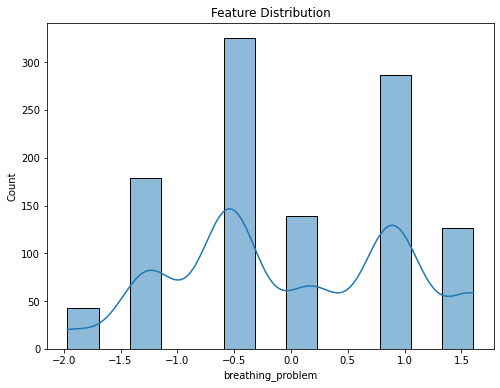

In [43]:
plot_feature_dic(data_set,['breathing_problem'])

In [44]:
data_set['breathing_problem']

0       0.890211
1       0.890211
2      -0.538282
3       0.175964
4      -1.252529
          ...   
1095   -0.538282
1096   -1.966776
1097   -0.538282
1098    0.890211
1099    0.175964
Name: breathing_problem, Length: 1100, dtype: float64

# Skewness (og'ishni aniqlash) --> agar featurlar soni kam bolsa

In [45]:
def tek_skew(data_set,features):
    for feature in features:
        skew=data_set[feature].skew()
        print(f"{feature}:skewness={skew:.2f}")

In [46]:
tek_skew(data_set,['breathing_problem'])

breathing_problem:skewness=-0.00


# Featurelar soni kop bolsa

In [47]:
def tek_skew_kop(data_set):
    for col in data_set.select_dtypes(include="number").columns:
        skew=data_set[col].skew()
        print(f"{col}: skewness:{skew:.2f}")

In [48]:
tek_skew_kop(data_set)

anxiety_level: skewness:-0.08
self_esteem: skewness:-0.40
mental_health_history: skewness:0.03
depression: skewness:0.22
headache: skewness:0.27
blood_pressure: skewness:-0.35
sleep_quality: skewness:0.18
breathing_problem: skewness:-0.00
noise_level: skewness:0.21
living_conditions: skewness:0.02
safety: skewness:0.19
basic_needs: skewness:0.14
academic_performance: skewness:0.18
study_load: skewness:0.23
teacher_student_relationship: skewness:0.20
future_career_concerns: skewness:0.20
social_support: skewness:-0.18
peer_pressure: skewness:0.20
extracurricular_activities: skewness:0.14
bullying: skewness:0.18
stress_level: skewness:0.01


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
for col in data_set.columns:
    if col!='stress_level':
        data_set[col]=scaler.fit_transform(data_set[[col]])

In [26]:
data_set.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0.480208,0.248612,-0.985559,-0.201393,-0.360741,-1.418416,-0.426445,0.890211,-0.488949,0.430695,...,-0.539196,0.160736,-0.472800,0.254213,0.229550,0.113869,0.187997,0.164249,-0.403377,1
1,0.643746,-1.093590,1.014653,0.316508,1.768859,0.981981,-1.072574,0.890211,0.264334,-1.357096,...,-0.539196,-1.253741,1.047901,-1.190927,1.537869,-0.841417,0.890749,1.575763,1.557071,2
2,0.153131,0.024912,1.014653,0.187033,-0.360741,-1.418416,-0.426445,-0.538282,-0.488949,-0.463200,...,-0.539196,-0.546502,0.287551,0.254213,-0.424609,0.113869,0.187997,-0.541508,-0.403377,1
3,0.807284,-0.646189,1.014653,0.316508,1.058992,0.981981,-1.072574,0.175964,1.017616,-0.463200,...,-0.539196,-0.546502,1.047901,-1.190927,0.883709,-0.841417,0.890749,0.870006,1.557071,2
4,0.807284,1.143414,-0.985559,-0.719293,-0.360741,0.981981,1.511942,-1.252529,0.264334,-0.463200,...,0.158587,0.867974,0.287551,-1.190927,-0.424609,-0.841417,1.593501,-1.953023,1.557071,1


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x=data_set.drop('stress_level',axis=1)

In [29]:
y=data_set['stress_level']

In [30]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.2,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [32]:
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred=model.predict(x_val)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
scor

NameError: name 'scor' is not defined